In [63]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.decomposition import PCA

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [99]:
df = pd.read_csv('C:\\Users\\thesk\\eclipse-workspace\\crowdsource2018_copy.csv', encoding = "ISO-8859-1")

In [100]:
df.shape

(378661, 17)

In [101]:
df.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,days_open,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,state,stateNY
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,9/10/2015,1000.0,11/8/2015 12:12,58.49,0.0,0,GB,0.0,0.0,1533.95,failed,No
1,1000003930,Greeting From Earth ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,1/11/2017,30000.0,2/9/2017 4:43,59.80,2421.0,15,US,100.0,2421.0,30000.00,failed,No


In [102]:
y = df.pop('stateNY')

Scale the data because if not PCA will not be able to find the optimal Principal Components. For eg. we have a feature in ‘m’ and another in ‘km’, the ‘m’ feature will have more variance than ‘km’ (1 km = 1000 m), so PCA will give more importance to the feature with high variance.

In [103]:
df.dtypes.value_counts()

object     8
float64    6
int64      2
dtype: int64

In [69]:
le = preprocessing.LabelEncoder()

In [104]:
df_encoded = df.apply(LabelEncoder().fit_transform)

In [105]:
df_encoded.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,days_open,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,state
0,175876,324270,108,12,5,3075,724,36525,5709,0,0,9,0,0,11173,1
1,175877,125635,93,6,13,26,5991,142083,5840,8764,15,21,7354,38017,38849,1
2,175878,357032,93,6,13,1884,6512,38153,4375,1195,3,21,12519,11363,41904,1


In [83]:
# Trying 3 components
pca = PCA(n_components=3)
components = pca.fit_transform(df_scaled)

total_var = pca.explained_variance_ratio_.sum() * 100
total_var

49.128323067761656

Text(0, 0.5, 'Explained variance')

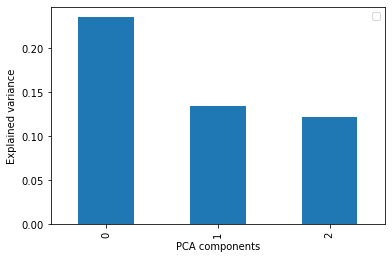

In [82]:
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('PCA components')
plt.ylabel('Explained variance')

In [107]:
def transform_pca(df, n):

    pca = PCA(n_components=n)
    pca.fit(df)
    df_new = pca.inverse_transform(pca.transform(df))

    return df_new
rows = 4
cols = 4
comps = 1

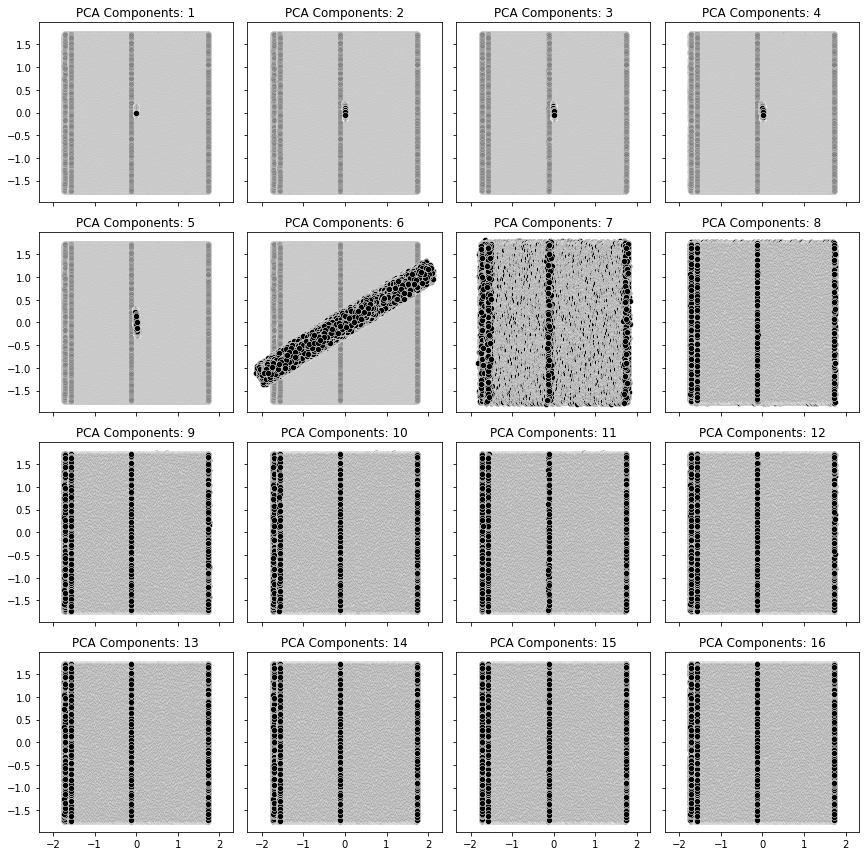

In [108]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)  # use df with numerically encoded categories as scaler cannot handle strings

fig, axes = plt.subplots(rows, 
                         cols, 
                         figsize=(12,12), 
                         sharex=True, 
                         sharey=True)


for row in range(rows):
    for col in range(cols):
        try:
            df_new = transform_pca(df_scaled, comps)
            ax = sns.scatterplot(x=df_scaled[:, 0], 
                                 y=df_scaled[:, 1], 
                                 ax=axes[row, col], 
                                 color='grey', 
                                 alpha=.3)
            ax = sns.scatterplot(x=df_new[:, 0], 
                                 y=df_new[:, 1], 
                                 ax=axes[row, col], 
                                 color='black')
            ax.set_title(f'PCA Components: {comps}');

            comps += 1
        except:
            pass
plt.tight_layout()
plt.savefig('pcavisualize_2.png', dpi=300)

The gray data is the original data, and the black points are the Principal Components. With just one component displayed, it takes the form of a set of points projected on a line that goes is along the axis with the most variance in the original data. As more and more components are added, the data starts to resemble the original data.

How do these components correlate with the actual features?

In [109]:
for col in df.columns:
    feature_names = list(df.columns)

<AxesSubplot:>

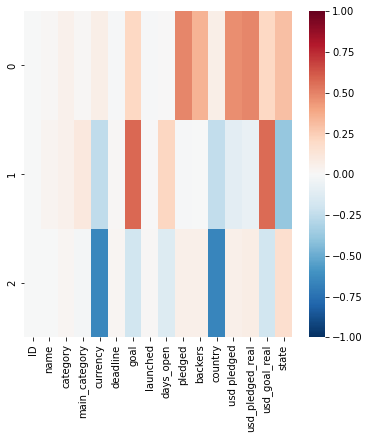

In [110]:
map= pd.DataFrame(pca.components_,columns=feature_names)
plt.figure(figsize=(6,6))
sns.heatmap(map,cmap='RdBu_r', vmin=-1, vmax=1)

Pledged, backers, usd_pledged correlates strongly with the first principal component.
Goal, usd_goal_real correlates strongly with the second principal component.